In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:

np.random.seed(100)

# Generates a 100 ndarrays of random numbers between 0 and 1.
noise = np.random.random(size=(100, 1))


x_train = 3 * np.random.random(size=(100, 1))
y_train = 9 + 2*x_train + noise


[2.99679681]


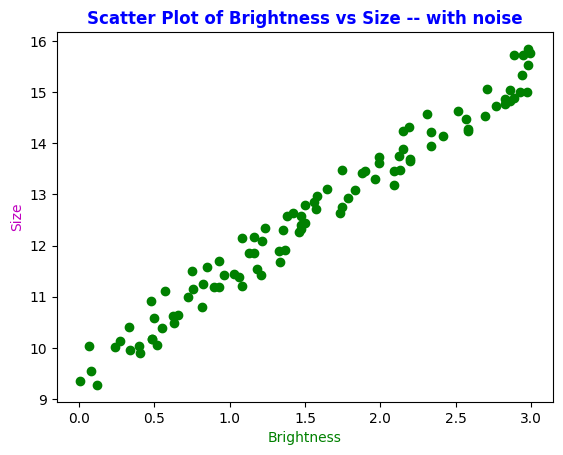

In [16]:
plt.scatter(x_train, y_train, color='green')
plt.xlabel('Brightness', color='g')
plt.ylabel('Size', color='m')
plt.title('Scatter Plot of Brightness vs Size -- with noise', weight='bold', color='blue')
plt.show()


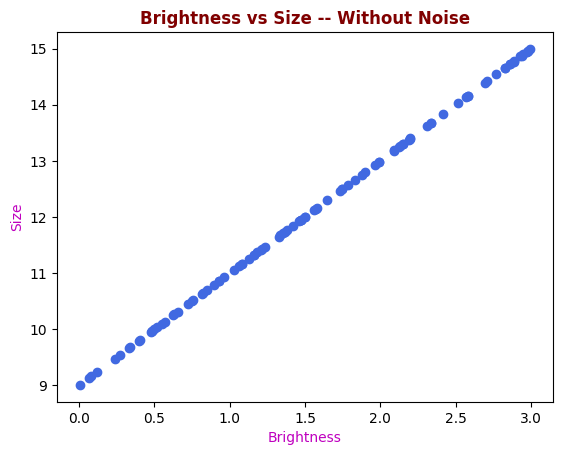

In [17]:
#without noise
plt.scatter(X_train, y_train-noise, color='royalblue')
plt.xlabel('Brightness', color = 'm')
plt.ylabel('Size', color = 'm')
plt.title('Brightness vs Size -- Without Noise', weight = 'bold', color = 'maroon')
plt.show()

**manual implementation of linear regression**

In [18]:
# Initialise the weight (W) and bias (b) to 0
W = 0
b = 0

learning_rate = 0.01

In [30]:
# Create a function for Predicted Output
def predict(X, W, b):
    '''
    X - Inputs
    W - Weight
    b - Bias

    Returns - Predicted output
    '''
    return W*X + b

# mean squared function
def cost_function(X, y, W, b):
    '''
    X - Inputs
    y - Actual Output
    W - Weight
    b - Bias

    Returns - MSE cost
    '''
    y_cap = predict(X, W, b)

    mse_cost = np.mean((y - y_cap)**2)
    return mse_cost

In [31]:
print("X_train:", X_train[:5])  # First 5 X_train values
print("y_train:", y_train[:5])  # First 5 y_train values
print("W:", W)  # Weight
print("b:", b)  # Bias
print("Predicted y_cap:", predict(X_train, W, b)[:5])  # First 5 predicted values


X_train: [[2.33486765]
 [2.3387952 ]
 [1.83098446]
 [0.92700105]
 [2.09320472]]
y_train: [[14.21314023]
 [13.95595978]
 [13.08648651]
 [11.69877822]
 [13.1911283 ]]
W: 0
b: 0
Predicted y_cap: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [32]:
# Check that cost function is not giving any errors!
cost_function(x_train, y_train, W, b)

161.44989262947942

**Back propogation , Gradiant descent optimizer**

In [33]:
def update_weights(X, y, W, b, learning_rate):
    '''
    This function computes all the equations needed for the backpropagation in Linear Regression
    '''

    # Gradients for cost wrt model parameters
    dLdW = np.mean(-2 * X * (y - predict(X, W, b)))
    dLdb = np.mean(-2 * (y - predict(X, W, b)))

    # Gradient Descent Optimizer (theta_new = theta_prev - learning_rate*dL_dtheta)
    W = W - learning_rate*dLdW
    b = b - learning_rate*dLdb

    return W, b

In [34]:
# Epoch by epoch train the linear regression to get the best value for W and b
def train(X, y, W, b, learning_rate, tol=1e-13, n_epochs=100, verbose=False):
    '''
    This function trains the linear regression epoch by epoch
    tol - Threshold for when the training should stop based on convergence
    verbose - Display the training if it is set to True
    '''

    weights = [W]
    biases = [b]
    costs = []


    # Training Loop
    '''
    Until Cost Convergers do the following:-
    1) Get the cost value on the current W and b value
    2) Append that cost value to the costs list
    3) If we have more than 1 cost value in costs list then compare if it has coverged
    4) If converged correct to 13 dp, then stop the training loop or else continue the training process

    At the same time, you can print the values of W, b and the respective cost after every n epochs
    '''

    # Prepare the counter to monitor the training
    ct = 1

    # Start the training loop here
    while True:
      # 1) Calculate the cost
      cost = cost_function(X, y, W, b)

      # 2) Append the cost value to costs list
      costs.append(cost)

      # 3) Check if the cost has converged if more than one cost value in the costs list
      if len(costs) > 1 and abs(costs[-1] - costs[-2]) < tol:
        break

      # 4) If costs have not converged, update the model parameters
      W, b = update_weights(X, y, W, b, learning_rate)

      # 5) Append the updated W and b to the weights and biases list
      weights.append(W)
      biases.append(b)

      # 6) After every n_epochs I want to display my training result
      if verbose and ct % n_epochs == 0:
        print(f'After {ct}:- W = {W}, b = {b}, cost = {cost}')

      # 7) Update the counter after epoch is completed to keep track for epochs
      ct += 1

    return weights, biases, costs, ct

In [35]:
# Train the linear regression model
weights, biases, costs, iteration_count = train(x_train, y_train, W, b, learning_rate, verbose=True)

After 100:- W = 4.371270980255095, b = 4.9223675279927726, cost = 5.09357952602552
After 200:- W = 3.627260111648974, b = 6.350228346474647, cost = 2.456398870793634
After 300:- W = 3.114290632476111, b = 7.332411667839953, cost = 1.207342476597626
After 400:- W = 2.7612588545764885, b = 8.008361502107816, cost = 0.615745393165454
After 500:- W = 2.5182982897188375, b = 8.473558019193861, cost = 0.33554418627685595
After 600:- W = 2.3510900105855543, b = 8.793711658638683, cost = 0.202831029737385
After 700:- W = 2.2360153332316717, b = 9.014045107160197, cost = 0.13997340640933104
After 800:- W = 2.156819605384098, b = 9.165681142351206, cost = 0.11020182299230447
After 900:- W = 2.102316186790805, b = 9.270038820782414, cost = 0.09610095292709307
After 1000:- W = 2.0648063018627574, b = 9.341858985651754, cost = 0.08942228441924822
After 1100:- W = 2.0389915639320098, b = 9.391286456245215, cost = 0.08625903188012053
After 1200:- W = 2.021225561831194, b = 9.425303014877619, cost = 0

In [36]:
# Comparing initial and final values
initial = [weights[0], biases[0], costs[0]]
final = [weights[-1], biases[-1], costs[-1]]
df = pd.DataFrame(list(zip(initial,final)),
                  columns = ['Initial', 'Final'],
                  index = ['Weight', 'Bias', 'Cost'])
df

,Initial,Final
Weight,0.000000,1.982015
Bias,0.000000,9.500380
Cost,161.449893,0.083413


3667
costs =  [161.44989262947942, 138.29613726425984, 118.6724440269477, 102.03896397262778, 87.9384190474846, 75.98347262708049, 65.84603176879723, 57.248185716942636, 49.954530390751216, 43.76566686502199, 38.5126942776851, 34.052545063704144, 30.264033678965735, 27.044509683714114, 24.30702274691922, 21.97792127173018, 19.994818318363876, 18.304868645180083, 16.863309281480134, 15.632223324058636, 14.579492814763373, 13.677911778554035, 12.904434925029564, 12.239541263288283, 11.666695053780705, 11.171889209169313, 10.743258533371513, 10.370752116825615, 10.045855839857715, 9.761357319964668, 9.511146811088704, 9.29004855591847, 9.093677933334657, 8.918320455555403, 8.760829273004246, 8.61853835608905, 8.489188956061303, 8.37086731388068, 8.261951896668824, 8.161068704479073, 8.067053413003238, 7.97891930663844, 7.895830116261222, 7.817077011519415, 7.742059112195892, 7.670266980391825, 7.6012686376042975, 7.5346977205082535, 7.4702434483217495, 7.407642124667536, 7.346669939225339

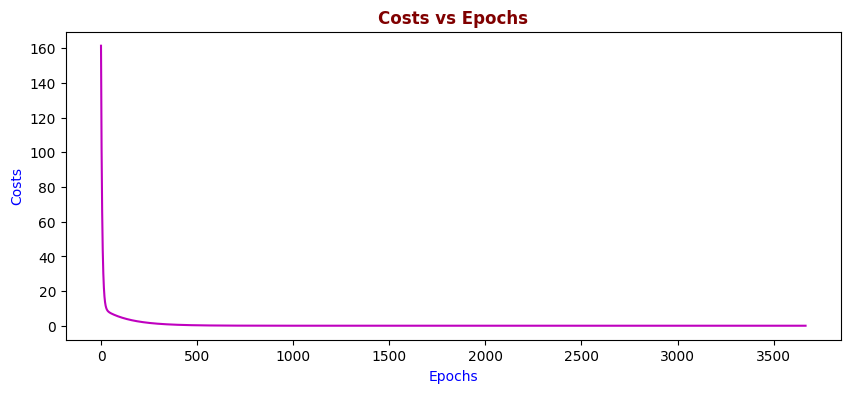

In [41]:
# Visualising the cost wrt epochs
plt.figure(figsize=(10, 4))
print(len(costs))
print("costs = " , costs )
plt.plot(costs, color='m')
plt.xlabel('Epochs', color='blue')
plt.ylabel('Costs', color='blue')
plt.title('Costs vs Epochs', weight='bold', color='maroon')
plt.show()

**Using scikit learn's Linear Regression**

In [42]:
# Training data - first 5 sample
print('First 5 Independent Feature:-\n', x_train[:5])
print()
print('Rescpective y_train values:-\n', y_train[:5])

First 5 Independent Feature:-
 [[2.33486765]
 [2.3387952 ]
 [1.83098446]
 [0.92700105]
 [2.09320472]]

Rescpective y_train values:-
 [[14.21314023]
 [13.95595978]
 [13.08648651]
 [11.69877822]
 [13.1911283 ]]


In [50]:
# Define a seed value (using different seed value compared to trianing set to avoid data leakage!) --> 5007
np.random.seed(5007)  # This number was choose to get the optimal results with random values

# Test data
x_test = 3*np.random.rand(10,1)
y_test = 9 + 2*x_test + np.random.rand(10,1)

prediction = predict(x_test, weights[-1], biases[-1])

# DataFrame to compare true and predicted outputs on test inputs
df1 = pd.DataFrame(list(zip(x_test.reshape(10,), y_test.reshape(10,), prediction.reshape(10,))),
                  columns = ['Test Input', 'True Output', 'Predicted Output'])
df1

,Test Input,True Output,Predicted Output
0,0.723836,10.889388,10.935035
1,1.900129,13.358554,13.266463
2,0.126943,9.974414,9.751983
3,2.026471,13.566160,13.516875
4,2.647429,14.842352,14.747624
5,1.238825,12.071978,11.955750
6,1.561243,12.881255,12.594786
7,2.042729,13.622504,13.549100
8,1.230220,12.098017,11.938694
9,0.382516,10.325675,10.258534


In [51]:
# Testing data - first 5 sample
print('First 5 x_test values:-\n', x_test[:5])
print()
print('Rescpective y_test value:-\n', y_test[:5])

First 5 x_test values:-
 [[0.72383636]
 [1.90012877]
 [0.12694282]
 [2.0264709 ]
 [2.64742922]]

Rescpective y_test value:-
 [[10.88938808]
 [13.35855419]
 [ 9.97441367]
 [13.56616042]
 [14.84235246]]


In [47]:
from sklearn.linear_model import LinearRegression

In [52]:
# Create the object of the Linear Regression
sklearn_model = LinearRegression(fit_intercept=True,  # If true include intercept
                                 copy_X=True,         # If true reserve a copy of X so that it remains unchanged
                                 n_jobs=None,         # If none, single CPU core, no parallelization used
                                 positive=False)      # If true, forces the coefficients to be positive

In [53]:
sklearn_model.fit(x_train, y_train)

LinearRegression()

In [56]:
print('Scikit-Learn model:-')
print('Optimal Weight = {}'.format(sklearn_model.coef_[0][0]))
print('Optimal Bias = {}'.format(sklearn_model.intercept_[0]))

print()

print('Scratch model:-')
print('Optimal Weight = {}'.format(weights[-1]))
print('Optimal Bias = {}'.format(biases[-1]))

Scikit-Learn model:-
Optimal Weight = 1.9820106046856956
Optimal Bias = 9.500387880985212

Scratch model:-
Optimal Weight = 1.982014510179785
Optimal Bias = 9.500380403136907


In [59]:
predictions = sklearn_model.predict(x_test)
mse_skl = np.mean((y_test - predictions)**2)

#rounds decimal to 5 places
print(f"The MSE value of sklearn model:- {round(mse_skl, 5)} (5dp)")


The MSE value of sklearn model:- 0.02023 (5dp)


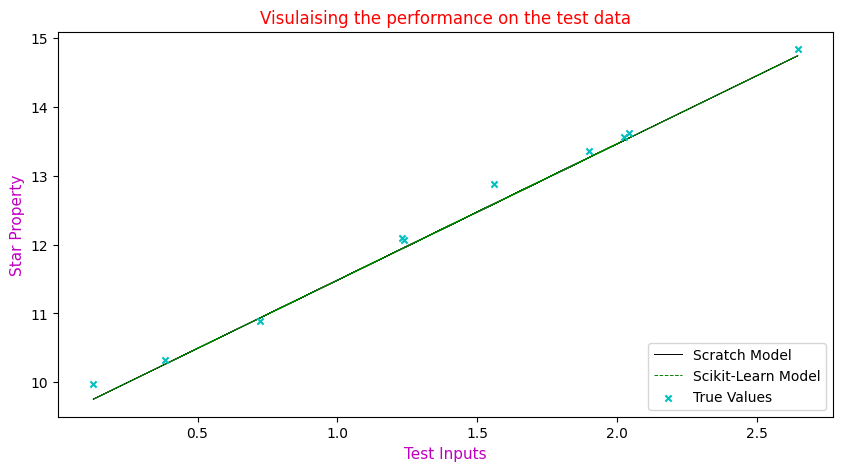

In [61]:
# Visualise the performance of the test data
plt.figure(figsize = (10,5))
plt.plot(x_test, prediction, color="k", label="predicted", linewidth = 0.7)
plt.plot(x_test, predictions,  "g--", label="predicted", linewidth = 0.7)
plt.scatter(x_test, y_test, color="c", label="original", marker = 'x', s = 20, zorder = 2)
plt.title(f"Visulaising the performance on the test data", color = 'red')
plt.xlabel("Test Inputs", color = 'm', fontsize = 11)
plt.ylabel("Star Property", color = 'm', fontsize = 11)
plt.legend(['Scratch Model', 'Scikit-Learn Model', 'True Values', ], loc = 'lower right')
plt.show()